In [3]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import datetime


In [5]:
start = '2014-03-10'
end = datetime.date.today()
df= yf.download('AAPL', start, end)

df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300
2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500
2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54081300


In [7]:
df.shape

(2579, 6)

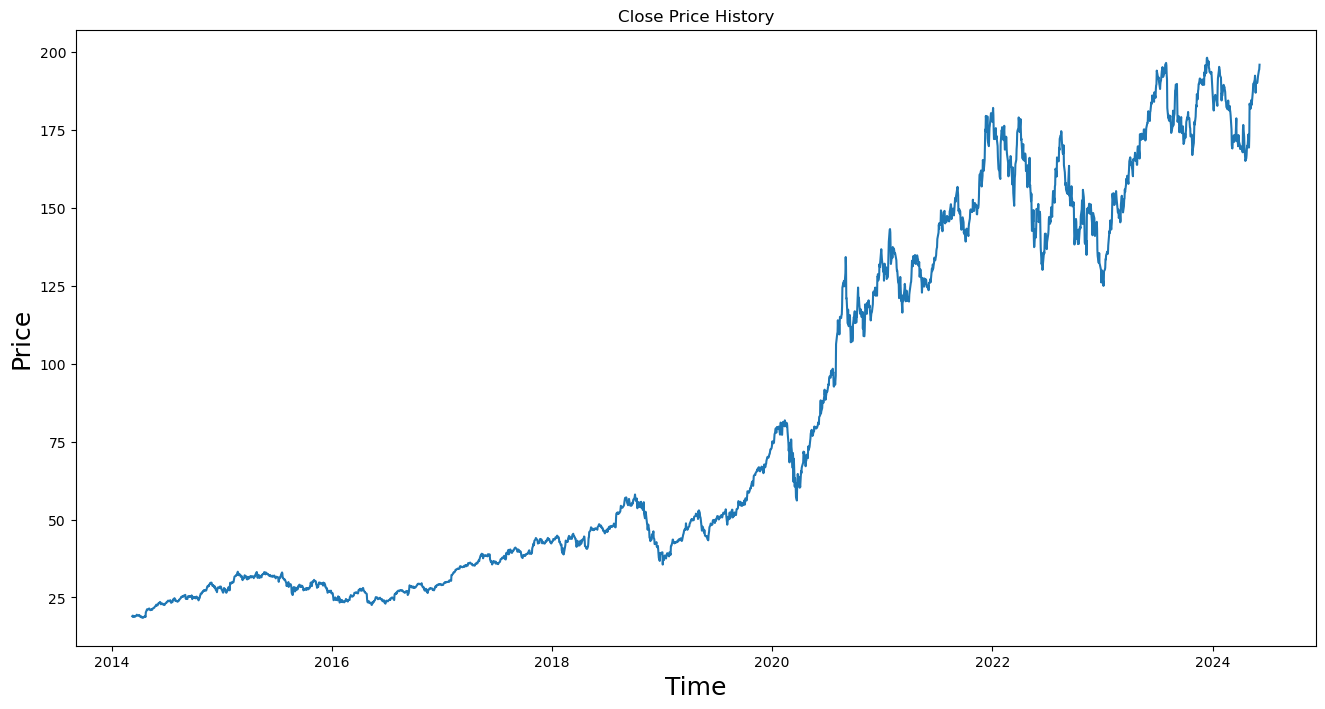

In [8]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Price',fontsize = 18)
plt.show()

In [9]:
data =  df.filter(['Close'])
dataset = data.values
train_len = math.ceil( len(dataset)* .8)
train_len

2064

In [11]:
scaler  = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(dataset)
scaled

array([[0.002577  ],
       [0.003605  ],
       [0.0037084 ],
       ...,
       [0.97728429],
       [0.97906595],
       [0.9875286 ]])

In [12]:
train = scaled[0:train_len, : ]

x_train = []
y_train = []

for i in range(100,len(train)):
    x_train.append(train[i-100:i,0])
    y_train.append(train[i,0])
    if i<=100:
        print(x_train)
        print(y_train)
        print()

[array([0.002577  , 0.003605  , 0.0037084 , 0.00252331, 0.00133821,
       0.00174584, 0.00267243, 0.0026446 , 0.00213556, 0.00296473,
       0.00422142, 0.0053747 , 0.00433873, 0.00387742, 0.00375811,
       0.00373426, 0.00471056, 0.00488952, 0.00414188, 0.00275594,
       0.00109561, 0.00108966, 0.00245769, 0.00109761, 0.00032809,
       0.0007397 , 0.        , 0.00020879, 0.00138791, 0.00262671,
       0.00273209, 0.00135014, 0.00990432, 0.01073349, 0.01513784,
       0.01478787, 0.01434247, 0.01461887, 0.01483758, 0.01650388,
       0.01520147, 0.01478787, 0.0139249 , 0.01343774, 0.0148873 ,
       0.01507221, 0.01509409, 0.01408994, 0.01581788, 0.01722568,
       0.01724954, 0.01756769, 0.01775857, 0.01912263, 0.02140932,
       0.02108719, 0.02334802, 0.02287478, 0.02200982, 0.02377752,
       0.02522509, 0.02572816, 0.02537421, 0.02742825, 0.0281938 ,
       0.02765096, 0.02546569, 0.02405987, 0.02534041, 0.02517339,
       0.02531258, 0.02486717, 0.02354488, 0.02343353, 0.0226

In [13]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [14]:
x_train = np.reshape(x_train,( x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1964, 100, 1)

In [15]:
model =  Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1))) 
model.add(LSTM(units = 50,return_sequences = False))
model.add(Dense(units= 25))
model.add(Dense(units= 1))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x_train,y_train,batch_size = 1,epochs = 11)

Epoch 1/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - loss: 5.3699e-04
Epoch 2/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - loss: 4.8969e-04
Epoch 3/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - loss: 3.2214e-04
Epoch 4/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 69s 35ms/step - loss: 3.0874e-04
Epoch 5/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - loss: 5.3020e-04
Epoch 6/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - loss: 3.2417e-04
Epoch 7/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - loss: 2.2628e-04
Epoch 8/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - loss: 2.0871e-04
Epoch 9/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - loss: 2.5892e-04
Epoch 10/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - loss: 1.8283e-04
Epoch 11/11
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - loss: 1.7301e-04


In [22]:
model.save('final_model.h5')

In [47]:
model.save('s_model.keras')


In [31]:
test = scaled[train_len - 100 :, : ]

x_test = []
y_test = dataset [train_len: , : ]

for i in range(100, len(test)):
    x_test.append(test[i-100:i, 0])
    

In [32]:
x_test = np.array(x_test)

In [33]:
x_test =  np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [34]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [35]:
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 3.4548


In [36]:
mape = np.mean(np.abs((y_test - predict) / y_test)) * 100
mape

1.6976169017232947

In [37]:
mae = mean_absolute_error(y_test, predict)
mae

2.838415082913001

In [38]:
rmse = np.sqrt(np.mean((predict - y_test) ** 2))
rmse

3.4547772689607608

C:\Users\User\AppData\Local\Temp\ipykernel_13332\3854893360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predict


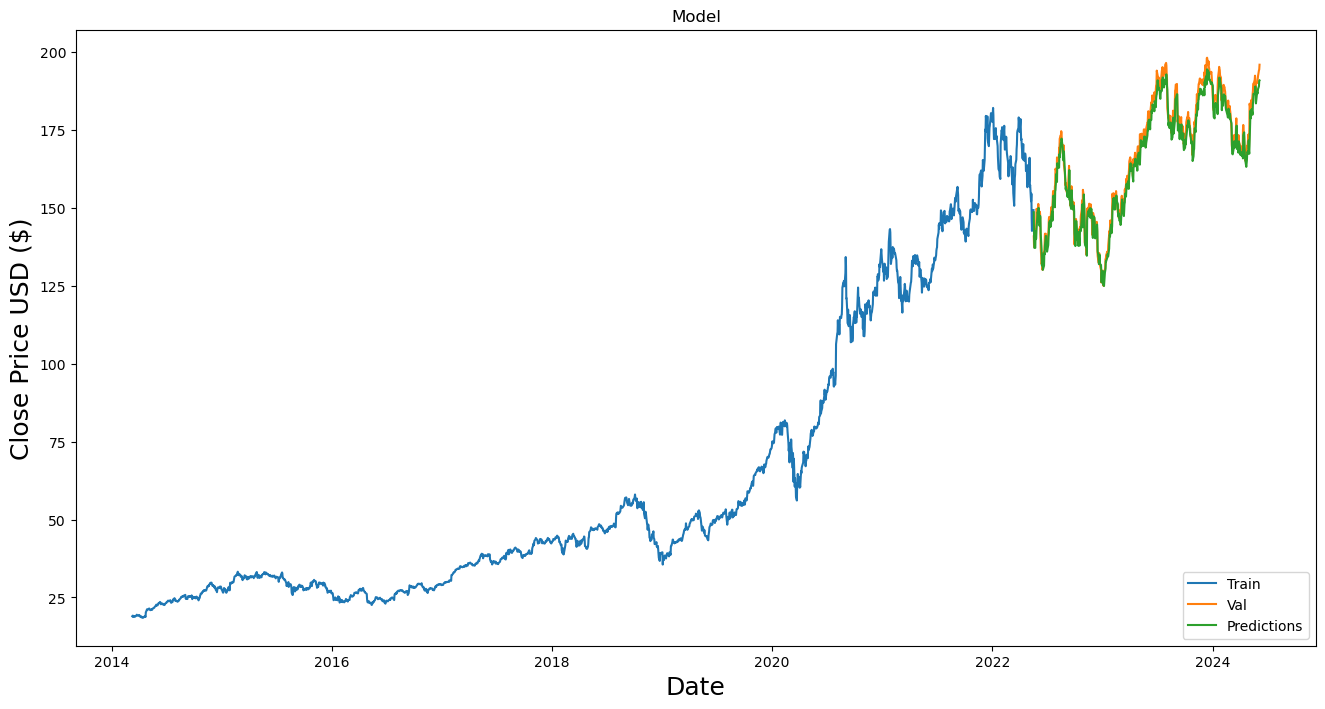

In [39]:
traind = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predict

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(traind['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [40]:
valid

,Close,Predictions
Date,,
2022-05-18,140.820007,148.538864
2022-05-19,137.350006,140.370377
2022-05-20,137.589996,137.111984
2022-05-23,143.110001,137.124054
2022-05-24,140.360001,142.423111
...,...,...
2024-05-30,191.289993,187.078491
2024-05-31,192.250000,188.051697
2024-06-03,194.029999,188.949646


In [49]:
start = '2014-04-24'
end = '2024-05-29'
pred1= yf.download('AAPL', start, end)

ndf = pred1.filter(['Close'])

lst100 = ndf[-100:].values
lst100_scaled = scaler.transform(lst100)

X_test = []
X_test.append(lst100_scaled)
X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[186.54683]]


In [46]:
start =  '2024-04-20'
end =  '2024-06-06'
pred2= yf.download('AAPL', start, end)
print(pred2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-22    165.839996
2024-04-23    166.899994
2024-04-24    169.020004
2024-04-25    169.889999
2024-04-26    169.300003
2024-04-29    173.500000
2024-04-30    170.330002
2024-05-01    169.300003
2024-05-02    173.029999
2024-05-03    183.380005
2024-05-06    181.710007
2024-05-07    182.399994
2024-05-08    182.740005
2024-05-09    184.570007
2024-05-10    183.050003
2024-05-13    186.279999
2024-05-14    187.429993
2024-05-15    189.720001
2024-05-16    189.839996
2024-05-17    189.869995
2024-05-20    191.039993
2024-05-21    192.350006
2024-05-22    190.899994
2024-05-23    186.880005
2024-05-24    189.979996
2024-05-28    189.990005
2024-05-29    190.289993
2024-05-30    191.289993
2024-05-31    192.250000
2024-06-03    194.029999
2024-06-04    194.350006
2024-06-05    195.869995
Name: Close, dtype: float64
